In [1]:
import seaborn as sns
import os
from time import time
import pprint
from sklearn.utils import shuffle
import numpy as np
from pandas.plotting import table
import pandas as pd
import os
import matplotlib.pyplot as plt
from time import time
pp = pprint.PrettyPrinter(indent=4, compact=True)

"""create dfs"""
dems = pd.read_csv('data\\dems_cleaned_up.csv')

cand_list = ['Biden', 'Booker', 'Buttigieg', 'DNC', 'Gabbard', 'Klobuuchar', 'Sanders', 'Steyer', 'Warren', 'Yang']

"""Candidate dataframes"""
biden = dems[dems['candidate'] == 'Biden']
booker = dems[dems['candidate'] == 'Booker']
buttig= dems[dems['candidate'] == 'Buttigieg']
dnc = dems[dems['candidate'] == 'DNC']
gabbard = dems[dems['candidate'] == 'Gabbard']
klob = dems[dems['candidate'] == 'Klobuchar']
sanders = dems[dems['candidate'] =='Sanders']
steyer= dems[dems['candidate'] =='Steyer']
warren = dems[dems['candidate'] == 'Warren']
yang = dems[dems['candidate'] == 'Yang']

dems.head(2)

,Unnamed: 0,created_at,original_text,clean_text,sentiment,polarity,subjectivity,favorite_count,retweet_count,hashtags,user_mentions,candidate,day,cand_num
0,0,2019-12-03 22:57:10+00:00,"My God, everyone here in the US NEEDS to see t...",my god everyone us needs see we idea bad healt...,"Sentiment(polarity=-0.49999999999999994, subje...",-0.5,0.622222,0,0,"medicareforall, bernie2020",NaN,Sanders,2019-12-03,6
1,1,2019-12-02 18:36:50+00:00,"Between the Ectopic pregnancy BS, the financia...",between ectopic pregnancy bs financial bs heal...,"Sentiment(polarity=0.20000000000000004, subjec...",0.2,0.466667,1,0,"gop, bernie2020, nurseswhotweet, trumpcult",NaN,Sanders,2019-12-02,6


Five number summary: count    60208.000000
mean         0.361935
std          0.314634
min          0.000000
25%          0.000000
50%          0.375000
75%          0.600000
max          1.000000
Name: subjectivity, dtype: float64


<Figure size 432x288 with 0 Axes>

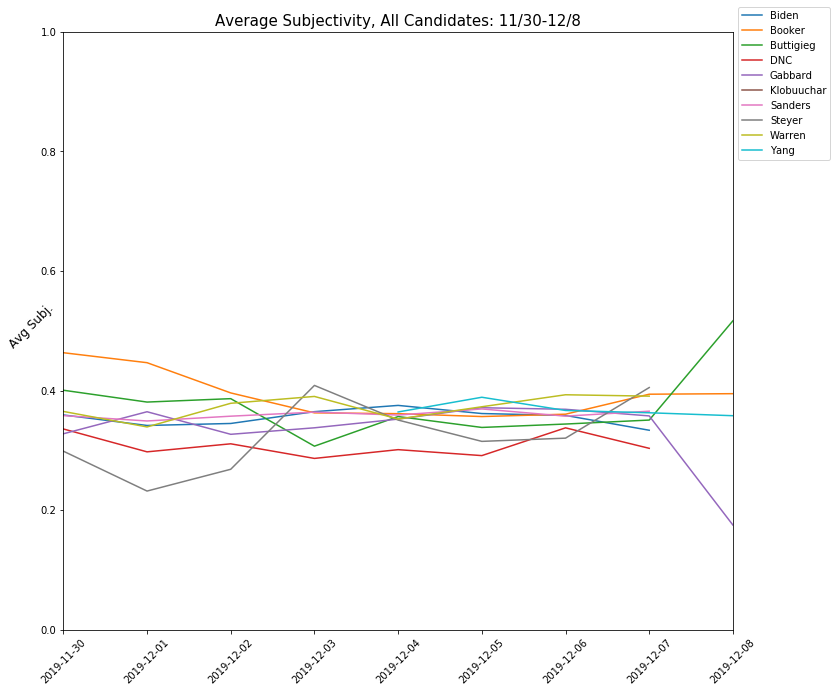

In [2]:
temp_term = ['day', 'candidate', 'subjectivity']
metric = 'mean'
print('Five number summary: {}'.format(dems['subjectivity'].describe()))



temp_biden = biden[temp_term].groupby(['day']).agg(metric)
temp_booker = booker[temp_term].groupby(['day']).agg(metric)
temp_buttig = buttig[temp_term].groupby(['day']).agg(metric)
temp_dnc = dnc[temp_term].groupby(['day']).agg(metric)
temp_gabbard = gabbard[temp_term].groupby(['day']).agg(metric)
temp_klob = klob[temp_term].groupby(['day']).agg(metric)
temp_sanders = sanders[temp_term].groupby(['day']).agg(metric)
temp_steyer = steyer[temp_term].groupby(['day']).agg(metric)
temp_warren = warren[temp_term].groupby(['day']).agg(metric)
temp_yang = yang[temp_term].groupby(['day']).agg(metric)
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
plt.figure()
temp_dem.plot(kind='line', legend=False, figsize=(12,11))
plt.ylim(0.0, 1)
plt.ylabel('Avg Subj.', fontsize=12, rotation=45)
plt.xticks(rotation=45)
plt.title('Average Subjectivity, All Candidates: 11/30-12/8'.format(metric), fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.savefig('charts\\subjectivity_all.png')
plt.show()

del temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang

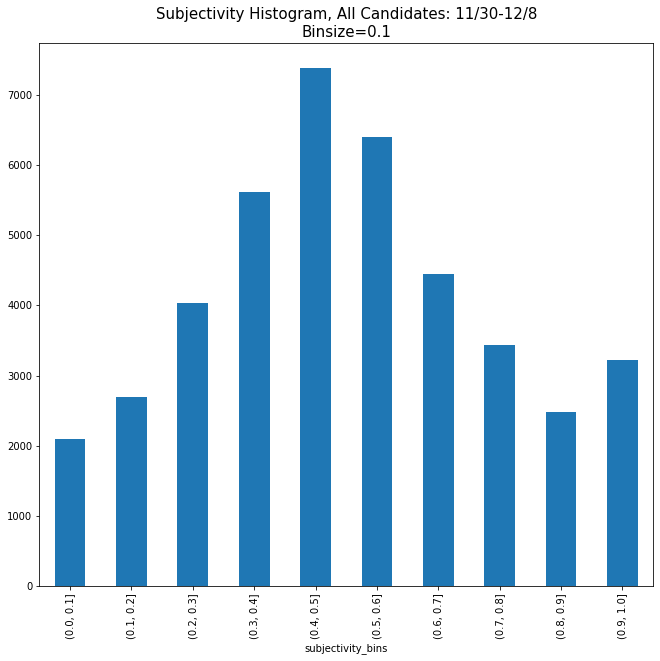

In [11]:
bins = np.arange(0, 1.1, 0.1)
dems['subjectivity_bins'] = pd.cut(dems['subjectivity'], bins=bins)#, labels=labels)
dems.groupby(['subjectivity_bins']).size().plot(kind='bar', figsize=(11,10))
plt.title('Subjectivity Histogram, All Candidates: 11/30-12/8\nBinsize=0.1', fontsize=15)
plt.savefig('charts\\subjectivity_hist_all.png')
plt.show()

In [4]:
dems['subjectivity_bins'].value_counts()

(0.4, 0.5]    7376
(0.5, 0.6]    6395
(0.3, 0.4]    5618
(0.6, 0.7]    4452
(0.2, 0.3]    4030
(0.7, 0.8]    3438
(0.9, 1.0]    3216
(0.1, 0.2]    2701
(0.8, 0.9]    2476
(0.0, 0.1]    2103
Name: subjectivity_bins, dtype: int64

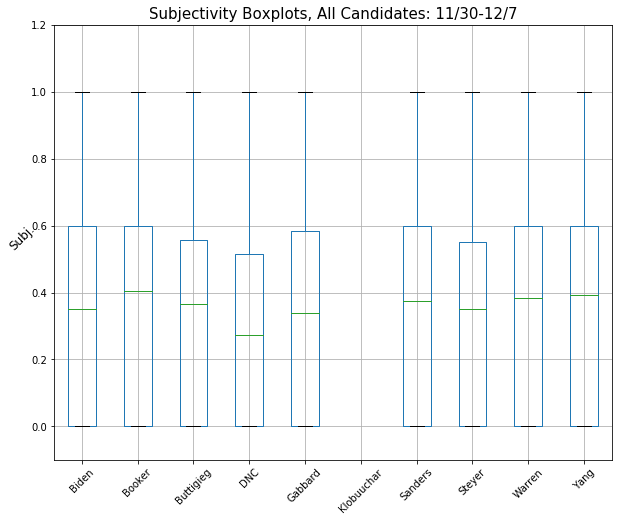

In [10]:
temp_term = ['subjectivity']

temp_biden = biden[temp_term]
temp_booker = booker[temp_term]
temp_buttig = buttig[temp_term]
temp_dnc = dnc[temp_term]
temp_gabbard = gabbard[temp_term]
temp_klob = klob[temp_term]
temp_sanders = sanders[temp_term]
temp_steyer = steyer[temp_term]
temp_warren = warren[temp_term]
temp_yang = yang[temp_term]
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
#plt.figure()
temp_dem.boxplot(figsize=(10,8))
plt.ylim(-0.1, 1.2)
plt.ylabel('Subj.', fontsize=12, rotation=45)
plt.xticks(rotation=45)
plt.title('Subjectivity Boxplots, All Candidates: 11/30-12/7'.format(metric), fontsize=15)
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.savefig('charts\\subjectivity_box_all.png')
plt.show()

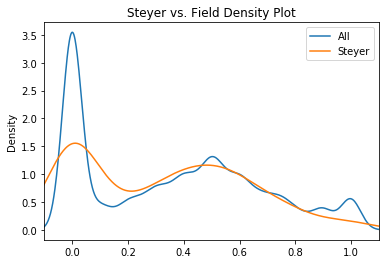

In [8]:
dems['subjectivity'].plot.kde(label='All')
steyer['subjectivity'].plot.kde(label='Steyer')
plt.legend()
plt.xlim(-0.1,1.1)
plt.title('Steyer vs. Field Density Plot')
plt.savefig('charts\\subjectivity_density_all_vs_steyer.png')
plt.show()